# Nearest centroid classification for the prediction of OncoGPS phenotypes, used for the Braun et. al. Clinical Samples (Output from OncoGPS with the CRISPR IO Down Geneset is used in this notebook) 
This method uses the B9991003 H Matrix, outputted from the NMF in the Chapter 3 Notebook, as features and OncoGPS phenotypes as the response variable to build a nearest centroid classifier for phenotypes. The classifier can predict phenotypes of the other clinical samples (Braun et. al.), using the H Matrices that were predicted from the B9991003 NMF results at the end of the Chapter 3 Notebook. Thus these classifiers can characterize any set of samples, other than those used to run the NMF and OncoGPS (B9991003). By comparing the phenotypes of predicted samples with those of B9991003, we can determine the accuracy and stability of the phenotypes produced by OncoGPS in the Chapter 5 Notebook.

In [ ]:
#import all necessary python libraries
from sklearn.neighbors import NearestCentroid
from scipy import stats
import numpy as np
import pandas as pd
import re
from notebook_environment import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

### 1. Read in H-Matrix produced from NMF of B9991003 gene expression matrix with CRISPR IO Down geneset (Each Column or Component is a Prediction Feature)

In [2]:
X = pd.read_table('h_k3_clinical_down-Copy1.tsv', index_col=0)
X = np.array(X) #convert to numpy array in order to build classifier where the components (columns) are features
X = stats.zscore(X) #normalize feature values by converting to z-score
X

array([[-0.3764609 ,  0.28858165,  0.08027416],
       [-0.28609154,  0.78058753, -0.74403705],
       [-0.88558035,  0.59041099,  0.31568998],
       ...,
       [ 0.54516158, -0.58851039,  0.12845661],
       [ 0.18466488,  0.53796524, -1.01401361],
       [-0.33214487, -0.34725392,  0.93407623]])

### 2. Read in list of phenotypes for each B9991003 as determined by OncoGPS Book No. 5 (Response Variable)

In [3]:
y = pd.read_table('sample_states_down_clinical_clinicalnmf-Copy1.txt_meta.tsv', index_col=0)
y = y.values[:,0]
y = [re.sub('P','',elem) for elem in y]
y = [int(i) for i in y]
y

[1,
 2,
 1,
 1,
 2,
 0,
 2,
 0,
 2,
 1,
 0,
 1,
 2,
 0,
 2,
 0,
 2,
 1,
 0,
 2,
 0,
 1,
 2,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 1,
 2,
 0,
 2,
 0,
 2,
 1,
 2,
 2,
 0,
 1,
 1,
 1,
 2,
 1,
 0,
 0,
 1,
 0,
 1,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 2,
 1,
 2,
 0,
 2,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 1,
 2,
 2,
 0,
 0,
 2,
 1,
 1,
 0,
 2,
 2,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 2,
 1,
 1,
 0,
 0,
 2,
 2,
 2,
 2,
 1,
 0,
 2,
 0,
 1,
 2,
 0,
 1,
 1,
 2,
 2,
 2,
 1,
 0,
 2,
 1,
 0,
 1,
 2,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 0,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 1,
 2,
 0,
 1,
 0,
 0,
 2,
 0,
 2,
 0,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 0,
 2,
 2,
 2,
 0,
 1,


### 3. Build Nearest Centroid Classifier with the training data (the B9991003 clinical features and phenotypes)

In [4]:
clf = NearestCentroid()
clf.fit(X, y)
df = pd.DataFrame(clf.centroids_, index=['P0','P1','P2'], columns=['C0', 'C1', 'C2'])
df.to_csv('centroids_down.tsv', index=True, header=True, sep='\t') #output a list of coordinates for all the centroids

### 4. Read in Test Features (H Matrix for the Braun et. al. Samples, Predicted from the B9991003 NMF in Book No. 3)

In [33]:
Xpred = pd.read_table('h_down_Braun.txt', index_col=0).T
sn = np.asarray(Xpred.index)
Xpred = np.array(Xpred)
Xpred = stats.zscore(Xpred) #normalize data, as with the B9991003 matrix
Xpred

array([[-6.69834800e-01,  4.67460316e-01, -3.17014823e-01],
       [ 1.05343980e+00, -8.84871598e-01, -6.05318534e-01],
       [-6.00042162e-02, -5.22275872e-01,  7.62338952e-04],
       [-2.23043117e+00,  1.26766090e+00,  2.94423724e-01],
       [ 5.85819109e-02, -5.59288022e-01,  2.16592223e+00],
       [-2.81902988e+00,  2.88487480e+00, -1.95857900e+00],
       [ 1.22499006e+00, -3.20581148e-01,  7.62841872e-01],
       [ 6.08690550e-01,  3.83426309e-01,  1.12779689e+00],
       [-1.57229133e+00,  1.83597367e+00,  2.12693437e-01],
       [ 5.28677481e-01,  3.85415738e-01,  5.36267538e-01],
       [-1.55890801e-02, -9.47672879e-01, -1.21373138e+00],
       [ 1.37828837e-01,  1.00324597e-01,  9.49994658e-01],
       [-1.94601468e+00,  1.84563014e+00, -1.06191019e+00],
       [-2.04423303e+00,  1.83886941e+00, -9.42712931e-01],
       [ 5.98009318e-01, -3.60957618e-01,  3.87848243e-01],
       [-8.84210818e-01,  1.01895954e+00, -6.27275920e-01],
       [-1.79037401e+00,  1.29068534e+00

### 5. Make predictions of the response variable (phenotype) for the Test Data (Braun et. al. samples)

In [34]:
preds = clf.predict(Xpred)
print(preds)

[2 0 1 1 1 2 0 1 2 1 0 1 2 2 0 2 1 2 2 1 0 0 1 2 2 2 2 0 1 2 0 0 0 2 0 0 2
 0 0 2 2 2 2 2 1 0 2 1 2 1 0 1 2 1 1 1 1 1 1 2 1 2 1 1 1 0 0 0 1 0 2 1 0 1
 2 2 0 0 2 1 2 0 0 2 0 2 1 1 2 2 0 1 1 1 0 2 0 2 2 0 0 2 1 1 0 0 1 0 0 0 0
 2 2 0 2 1 1 0 1 1 1 2 1 1 1 0 1 1 0 0 0 0 2]


### 5.1. Output list of predicted phenotypes to a CSV

In [35]:
pheno = pd.Series(preds, index=sn)
pheno.name = 'State'
pheno.index.name = 'Sample'
#pheno.to_csv('phenotypes_down_Braun.tsv', index=True, header=True, sep='\t')

### 6. For each Braun et. al. Sample, calculate the distance of the sample's feature values to each centroid
This can help us validate the effectiveness of the classification method

In [8]:
distmat = []
for c in clf.centroids_:
    dist = (Xpred-c)**2
    dist = np.sum(dist, axis=1)
    dist = np.sqrt(dist)
    distmat.append(dist)
distframe = pd.DataFrame(distmat, index=['P0 Centroid','P1 Centroid','P2 Centroid'], columns=sn).T
distframe.to_csv('disttocentroids_down_Braun.tsv', index=True, header=True, sep='\t')

### 7. Plot OncoGPS Map of the Braun et. al. Samples and their classified phenotypes, using the same NMF Components as in the corresponding Book No. 5 Plot
This can help us see whether the phenotypes predicted for Braun et. al. samples demonstrate a similar pattern as the B9991003 phenotypes, thus showing that the phenotypes predicted in Book No. 5 are stable

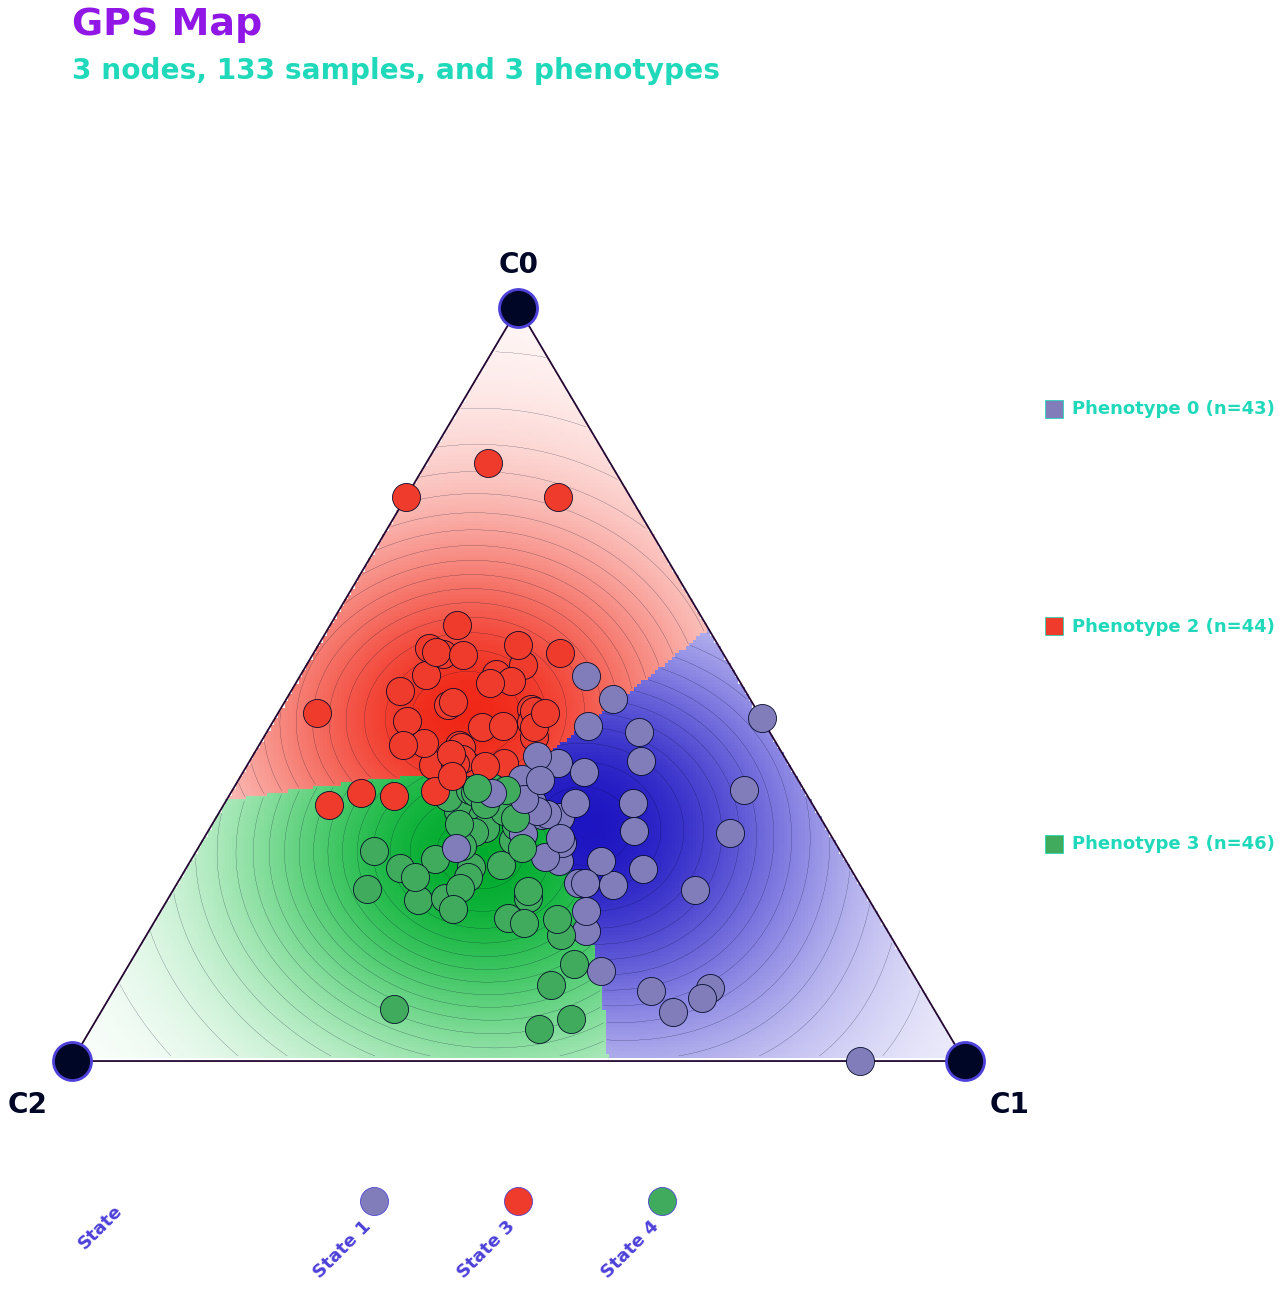

In [36]:
PURPLE = '#807DBA'
BLUE = '#4292C6'
GREEN = '#41AB5D'
RED = '#EF3B2C'

hmat = pd.read_table('h_down_Braun.txt', index_col=0)
pheno = pheno.map({2: 0, 3: 1, 0: 2, 1: 3})
gps_map = ccal.GPSMap(
    hmat,
    pull_power=1.2,
    node_x_dimension=pd.DataFrame(
        [[0.5, np.sqrt(3)/2], [1, 0], [0, 0]], index=hmat.index))

gps_map.set_sample_phenotypes(
    pheno,
    phenotype_type='categorical',
    bandwidth_factor=2.8,
    phenotype_color_map=mpl.colors.ListedColormap([PURPLE, BLUE, RED, GREEN]),
    phenotype_to_str={i: 'State {}'.format(i + 1)
                      for i in range(4)})

gps_map.plot_samples_with_phenotype()

### 8. Plot Braun et. al. H-matrix with columns sorted by phenotype

No handles with labels found to put in legend.
No handles with labels found to put in legend.


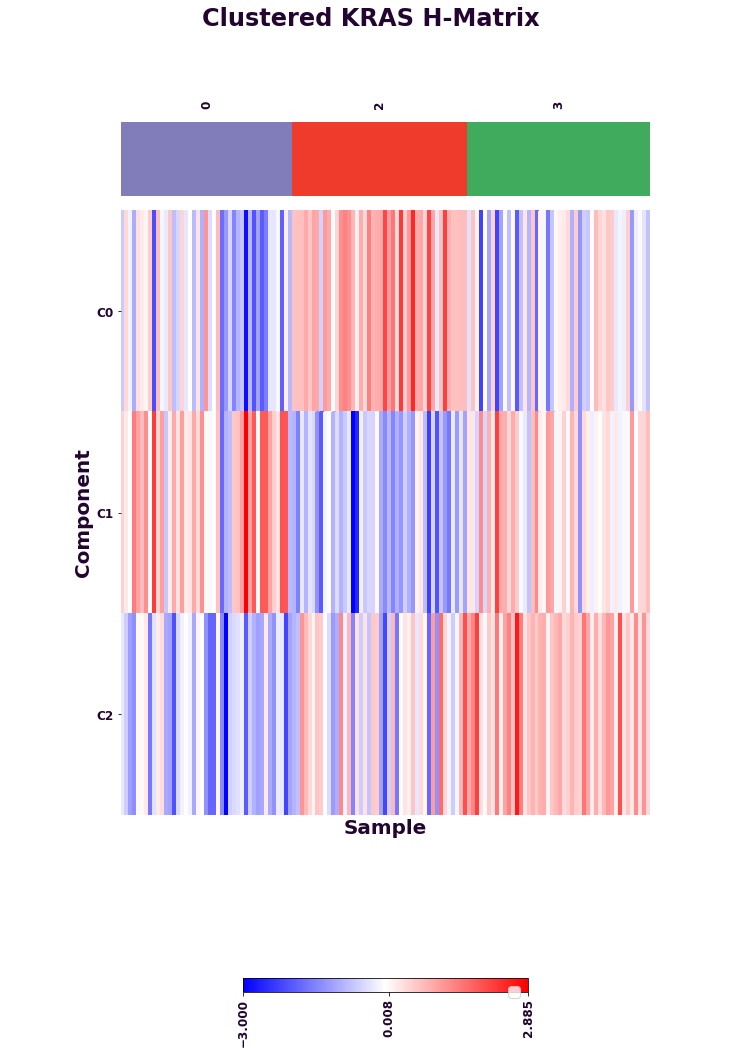

In [37]:
ccal.plot_heatmap(
    hmat,
    data_type='continuous',
    normalization_method='-0-',
    normalization_axis=1,
    column_annotation=pheno,
    annotation_colors=[PURPLE, BLUE, RED, GREEN],
    title='Clustered CRISPR IO Down H-Matrix',
    xlabel='Sample',
    ylabel='Component',
    xticklabels=False)